In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
print("Please upload u.data, u.item, and u.user files")
uploaded = files.upload()

Please upload u.data, u.item, and u.user files


Saving u.data to u.data
Saving u.item to u.item
Saving u.user to u.user


In [3]:
ratings = pd.read_csv('u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:

movies = pd.read_csv('u.item', sep='|', encoding='latin-1',
                     names=['movie_id','title','release_date','video_release_date','IMDb_URL'] + [f'genre_{i}' for i in range(19)])
movies

,movie_id,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
users = pd.read_csv('u.user', sep='|', names=['user_id','age','gender','occupation','zip_code'])
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [6]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
movies.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
num_users = ratings['user_id'].nunique()
num_items = ratings['item_id'].nunique()
num_ratings = len(ratings)
density = num_ratings / (num_users * num_items) * 100

print(f"Number of users: {num_users}")
print(f"Number of movies: {num_items}")
print(f"Number of ratings: {num_ratings}")
print(f"Matrix density: {density:.2f}%\n")

Number of users: 943
Number of movies: 1682
Number of ratings: 100000
Matrix density: 6.30%



/tmp/ipython-input-91157125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


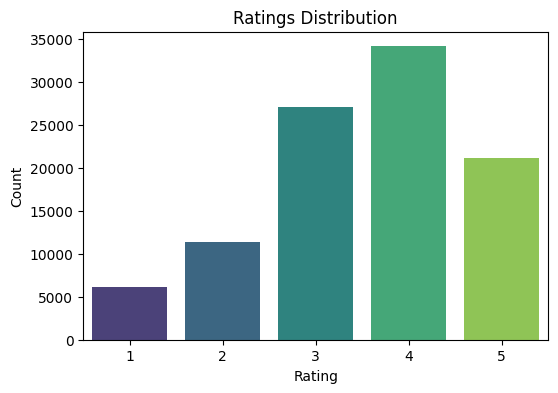

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

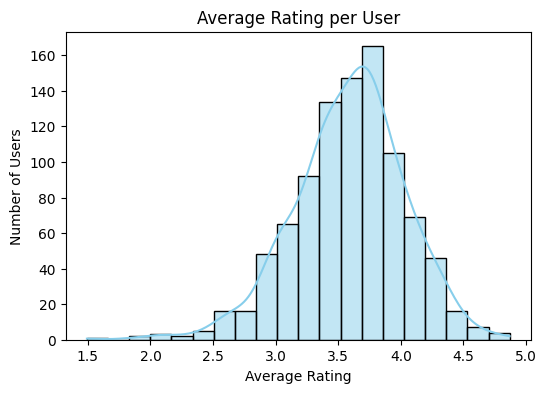

In [11]:
user_mean = ratings.groupby('user_id')['rating'].mean()
plt.figure(figsize=(6,4))
sns.histplot(user_mean, bins=20, kde=True, color='skyblue')
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

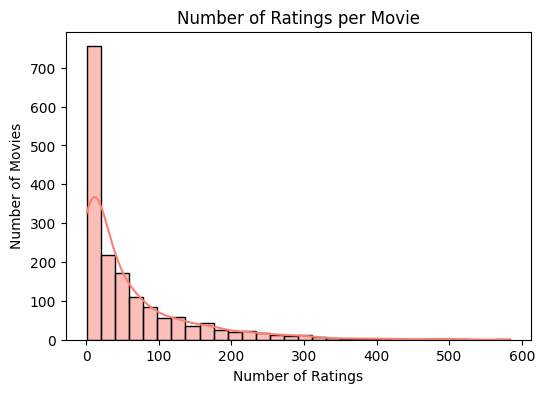

In [12]:
item_counts = ratings.groupby('item_id')['rating'].count()
plt.figure(figsize=(6,4))
sns.histplot(item_counts, bins=30, kde=True, color='salmon')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

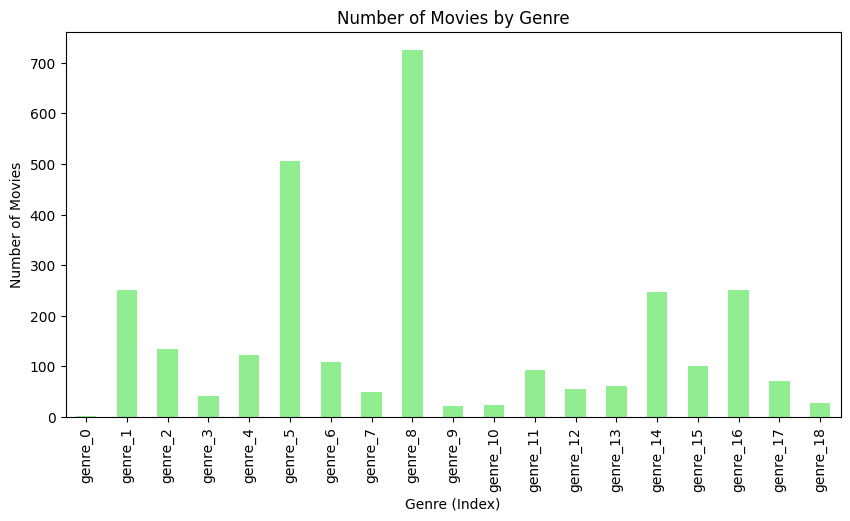

In [13]:
genre_counts = movies[[f'genre_{i}' for i in range(19)]].sum()
plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre (Index)')
plt.ylabel('Number of Movies')
plt.show()